In [42]:
import matplotlib.pyplot as plt
from math import sqrt
from pathlib import Path
import pandas as pd
import numpy as np

In [62]:
DATA_DIR = '/home/robert/DataStorage/Amargosa/rawdata/patches/cleaned_data'
FILE = Path(f'{DATA_DIR}/All_NS_processedOn_2021_11_17.csv')# north - south lines

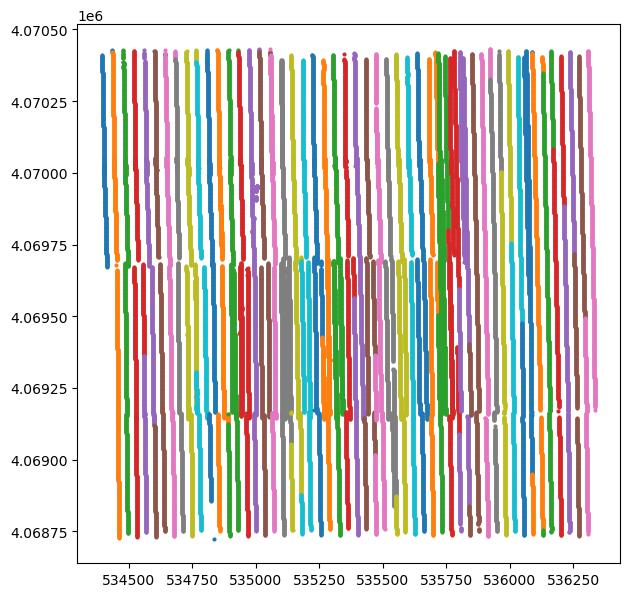

In [63]:
df = pd.read_csv(FILE,sep=',')
df = df.sort_values(by='Easting')
df = df.drop(columns=['Long','Lat','Heading','dir'])

line = 

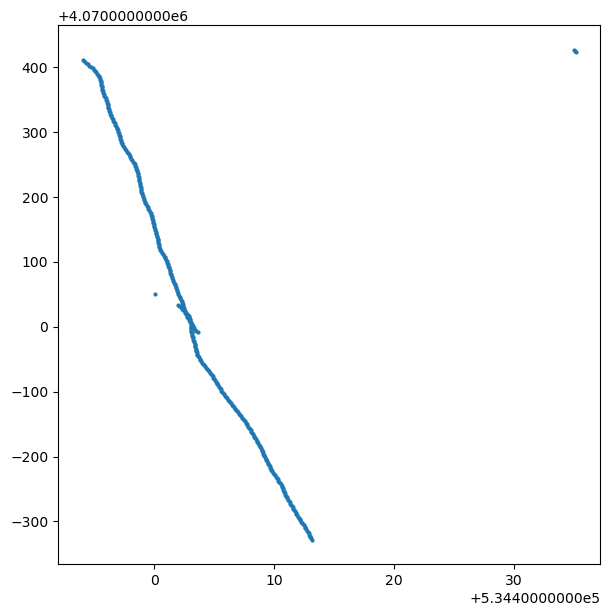

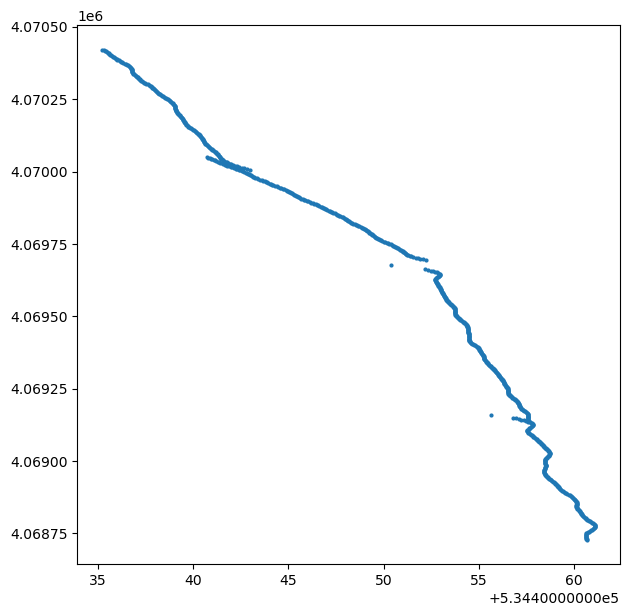

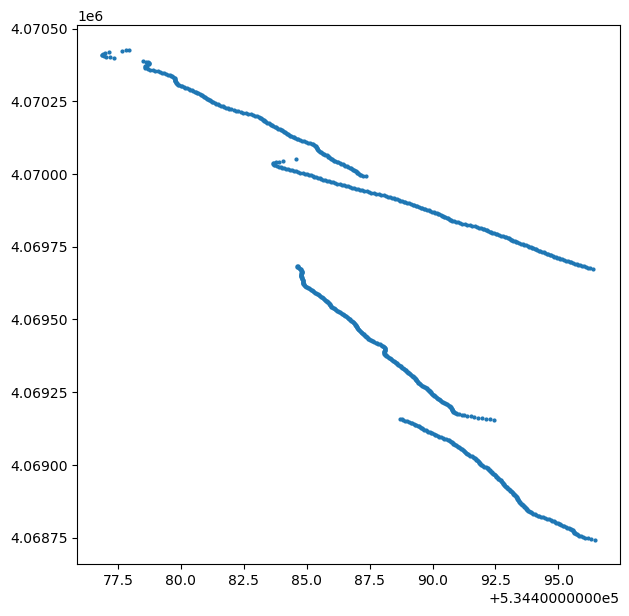

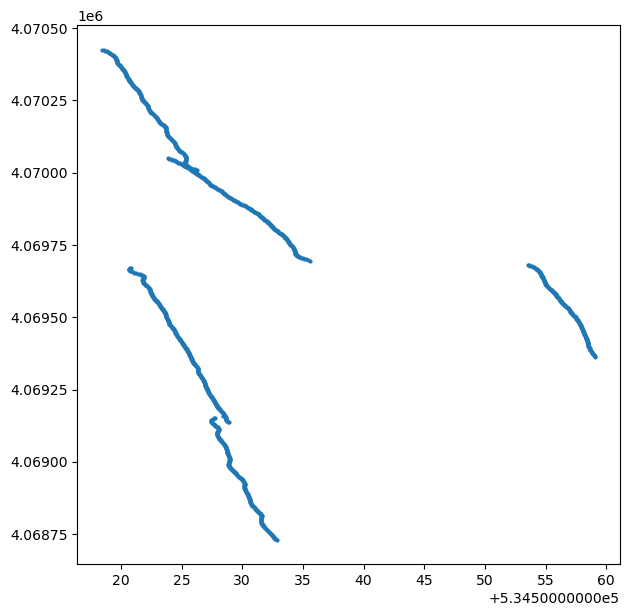

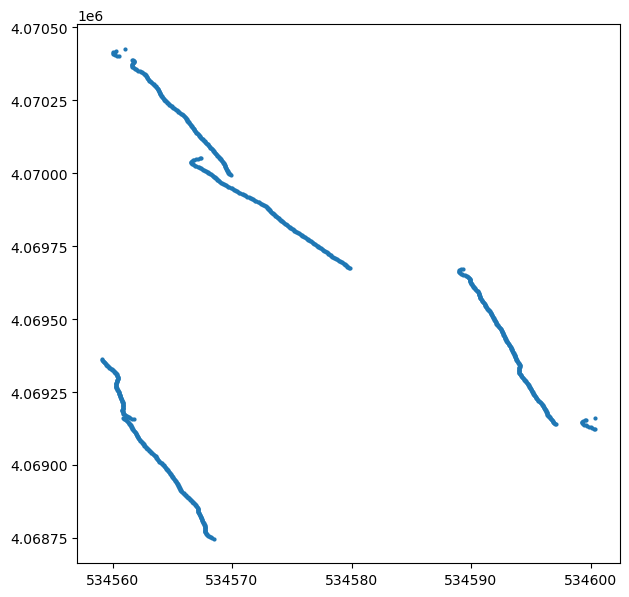

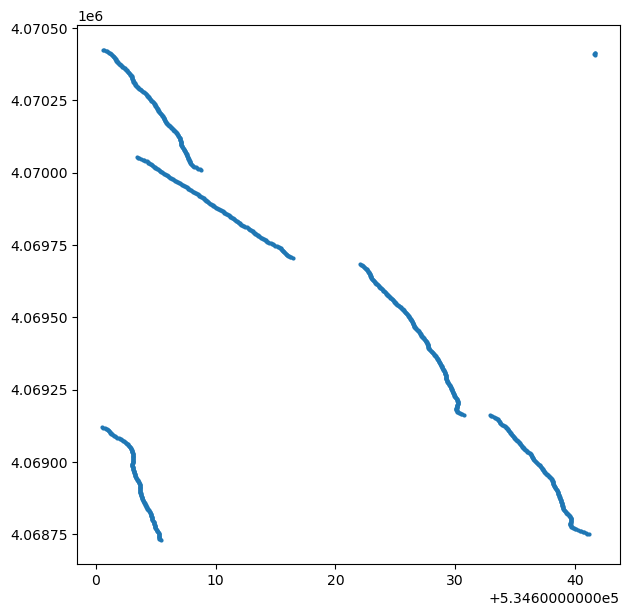

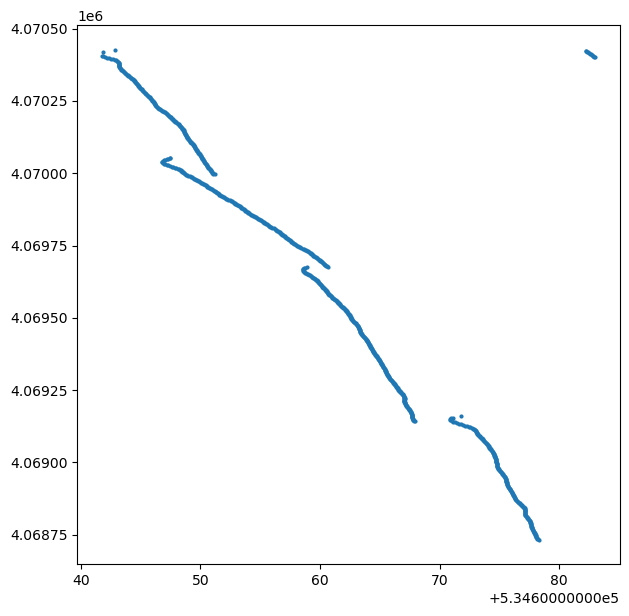

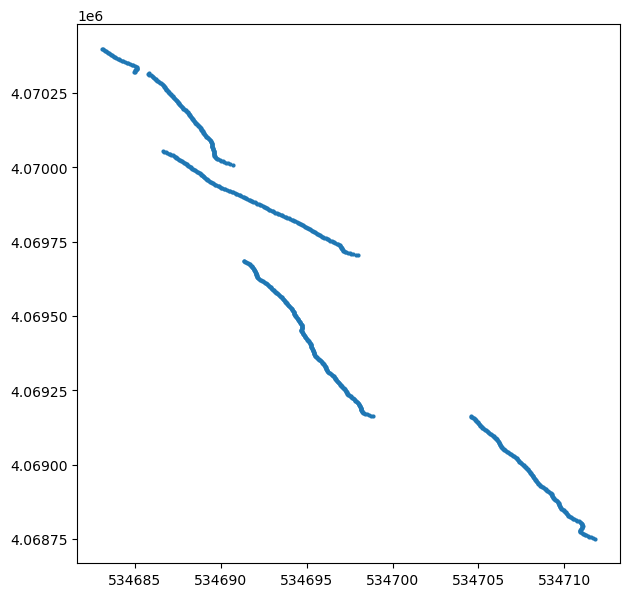

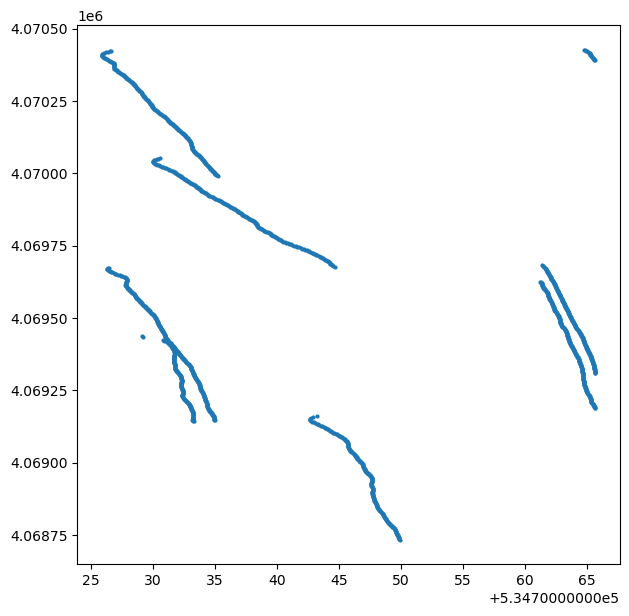

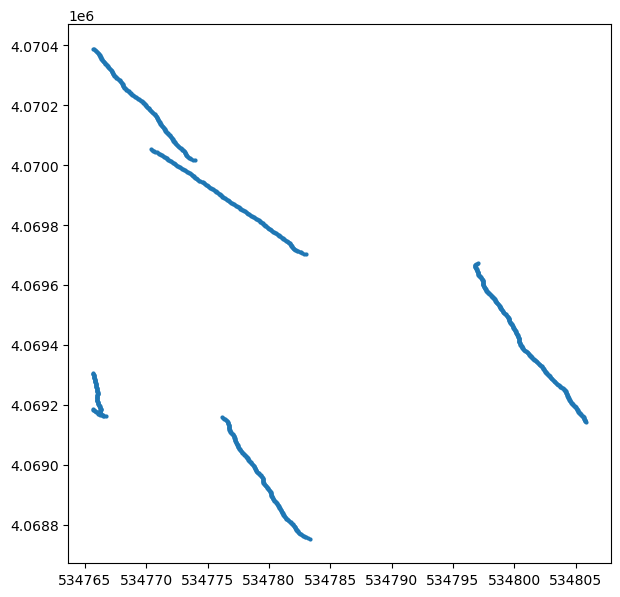

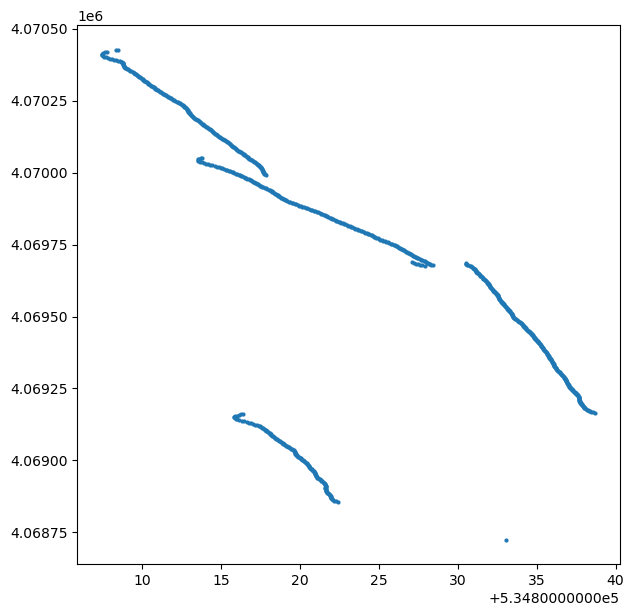

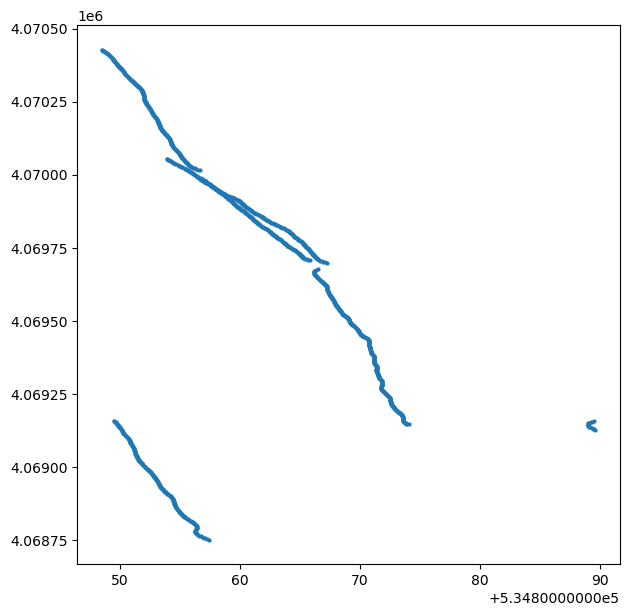

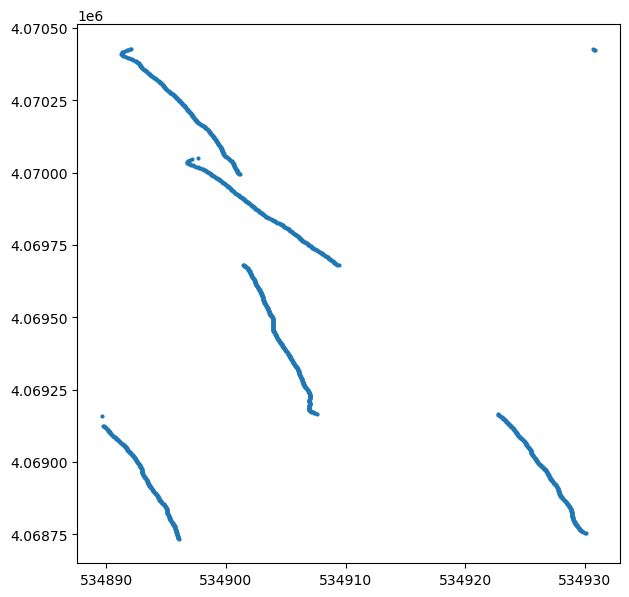

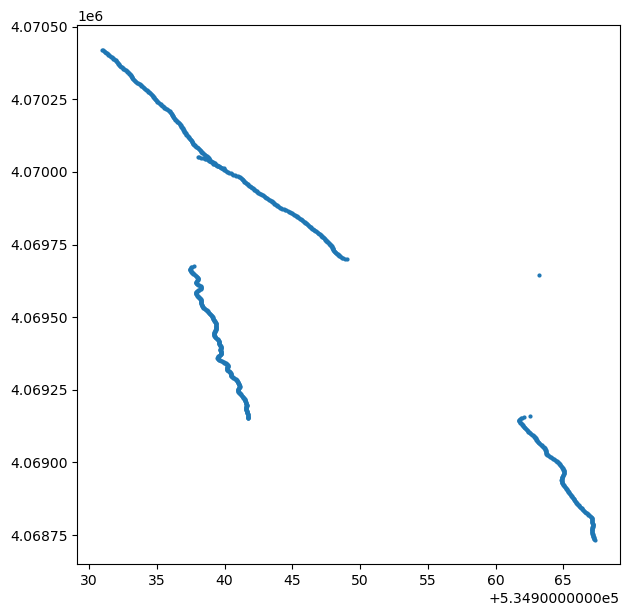

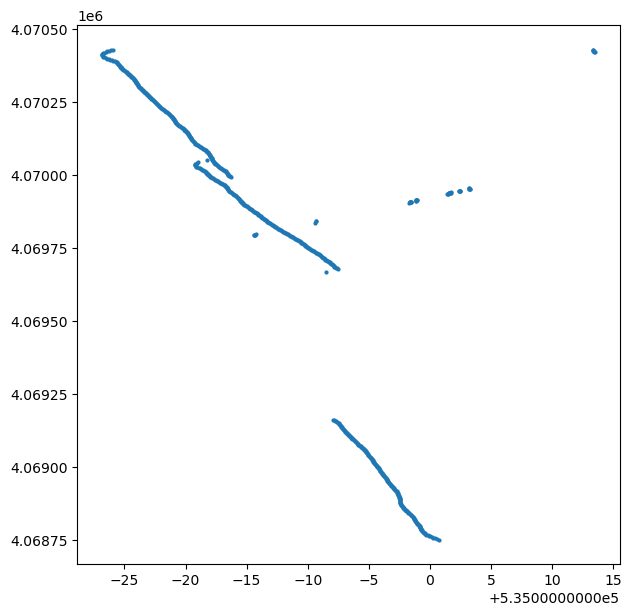

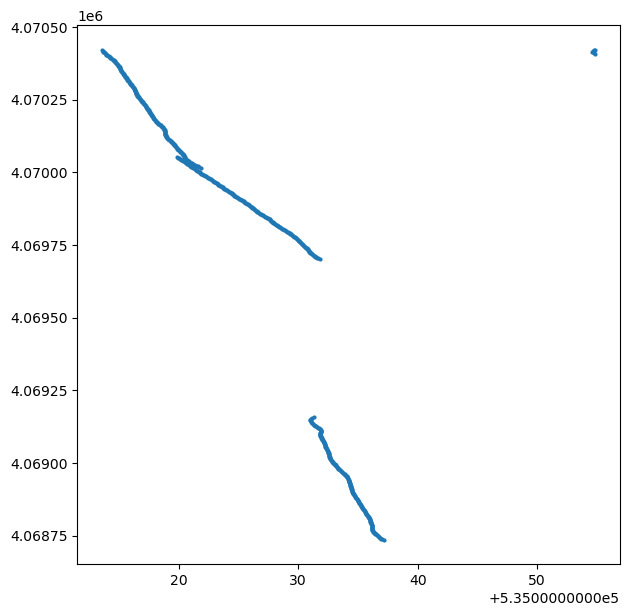

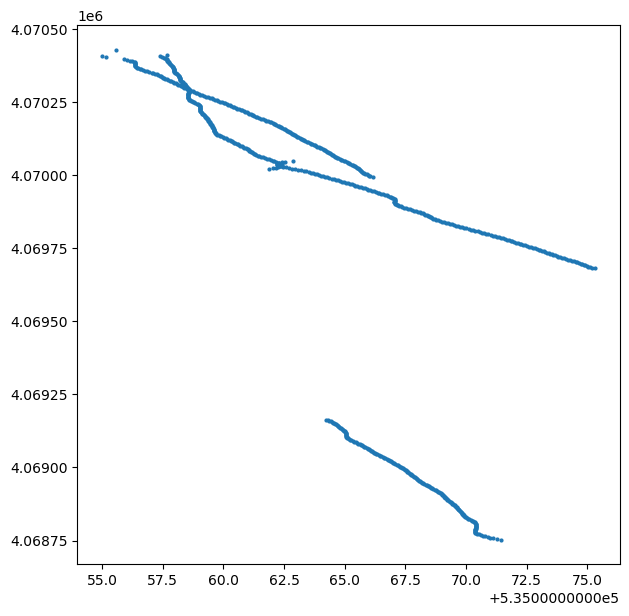

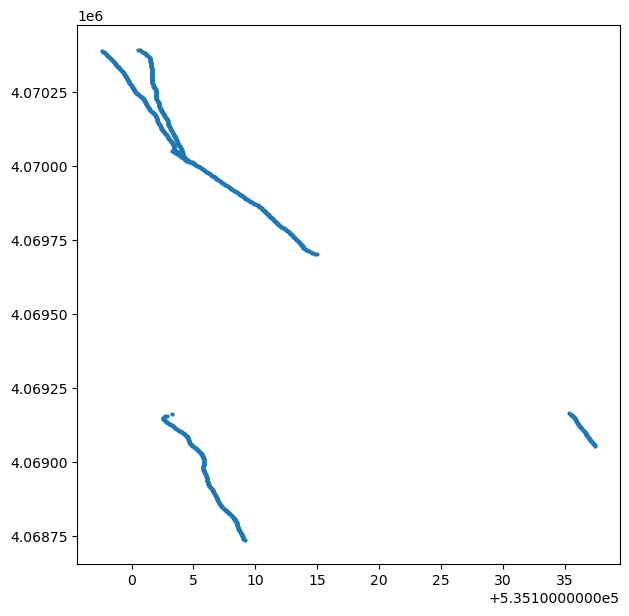

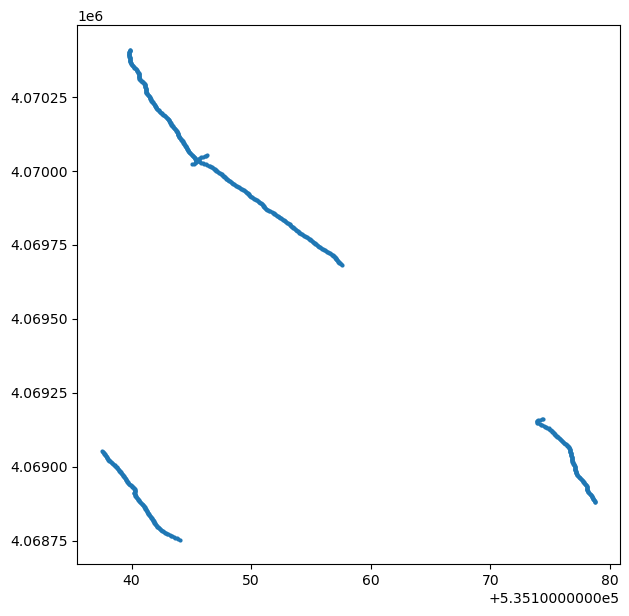

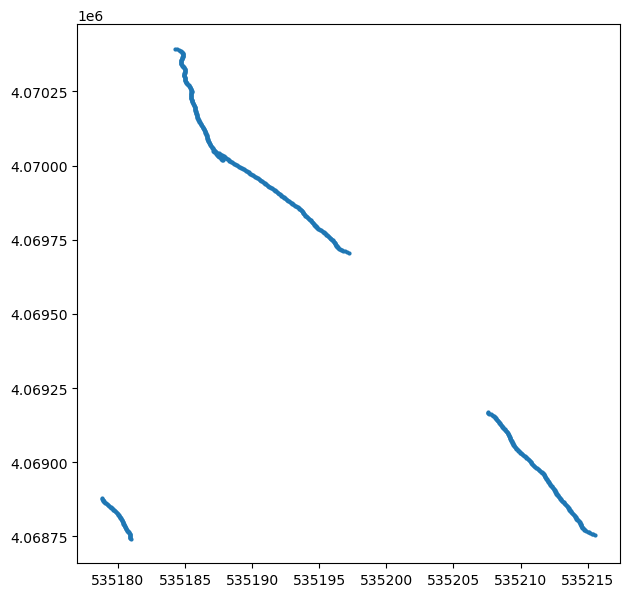

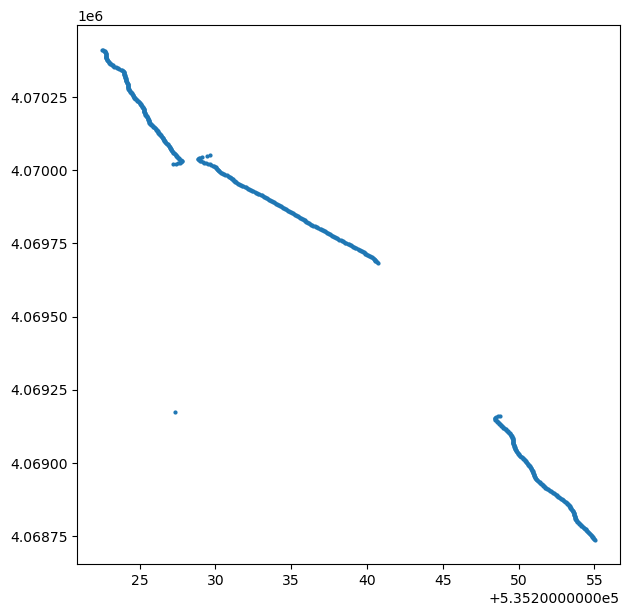

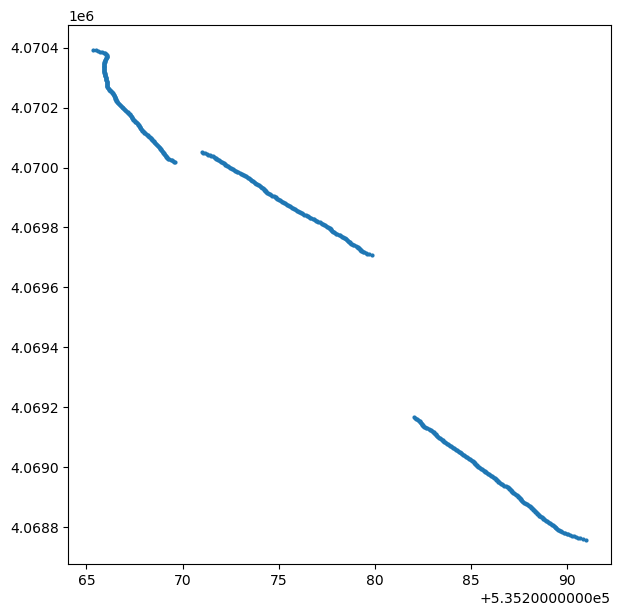

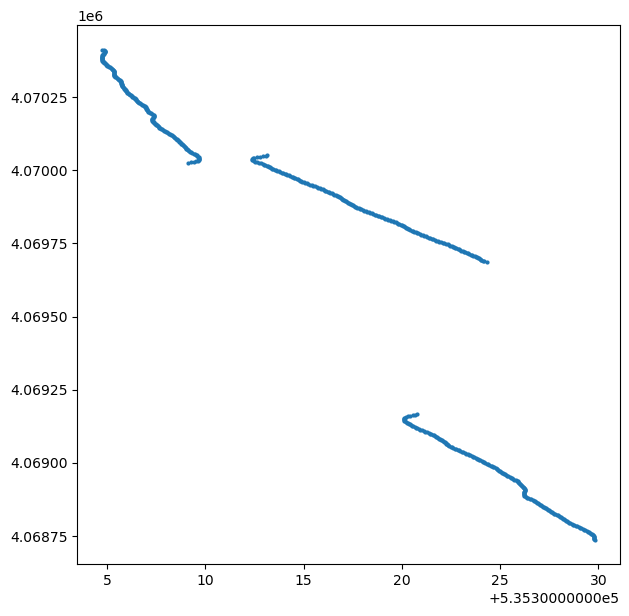

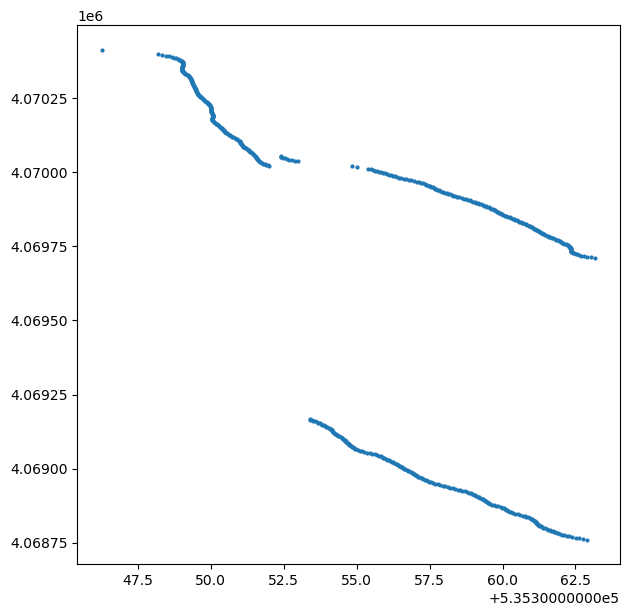

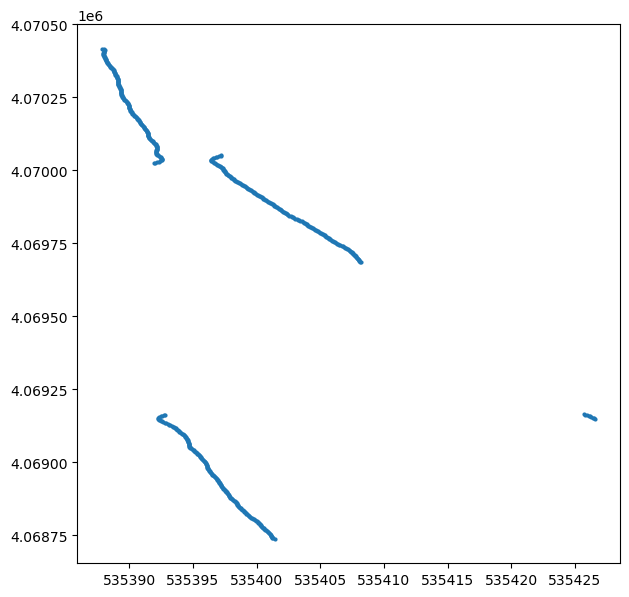

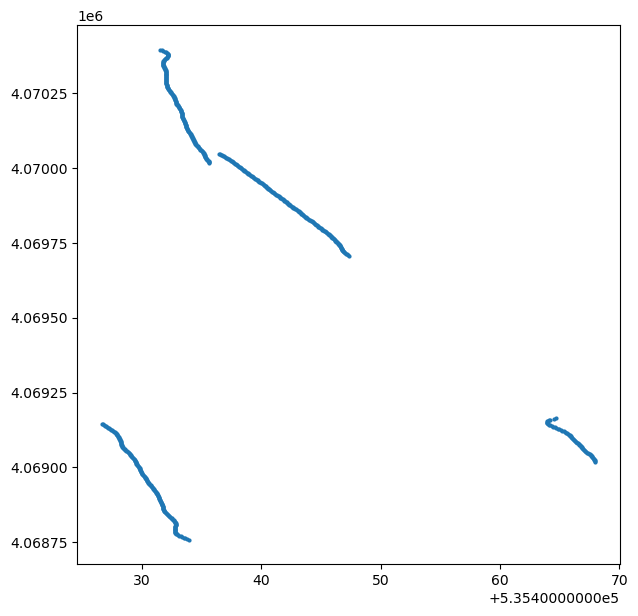

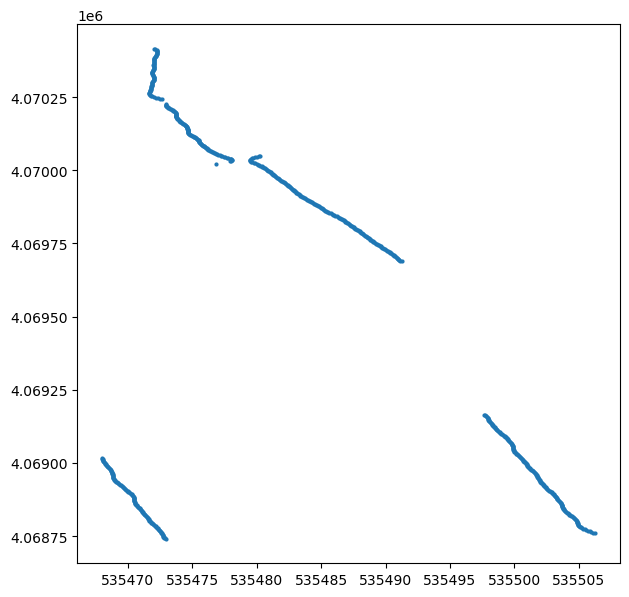

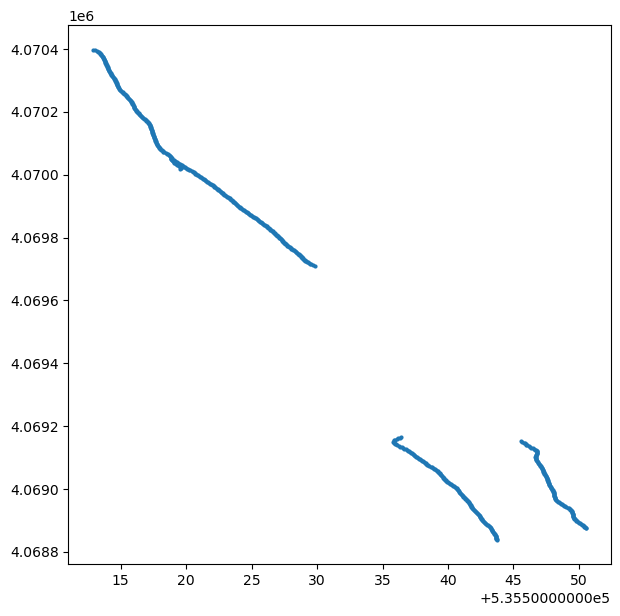

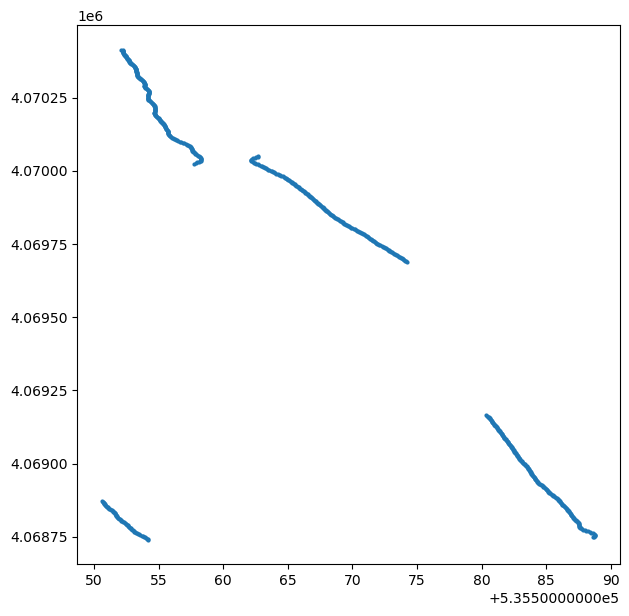

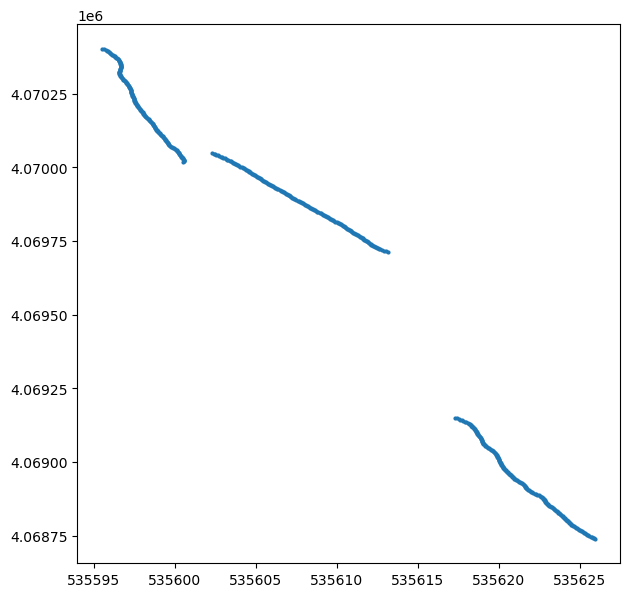

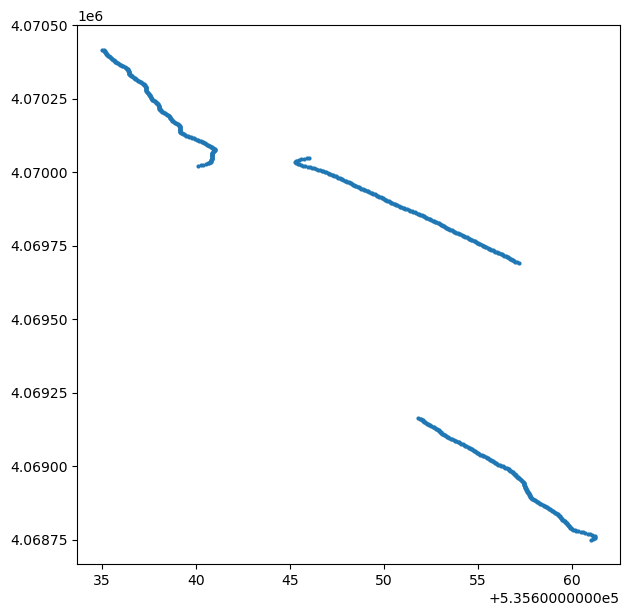

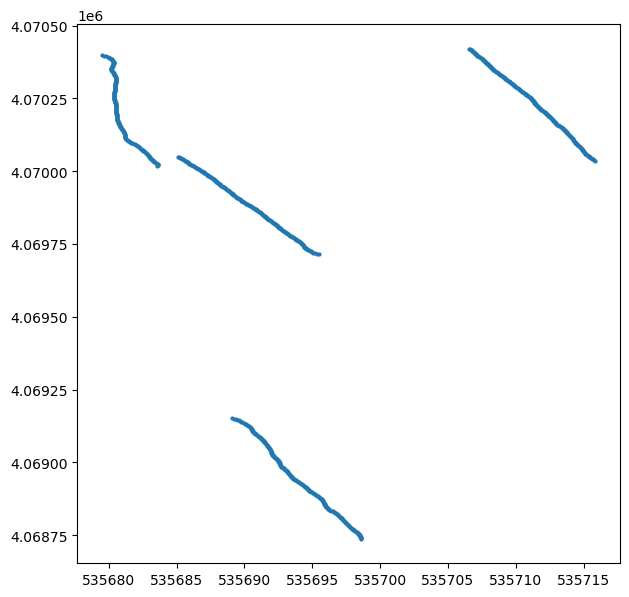

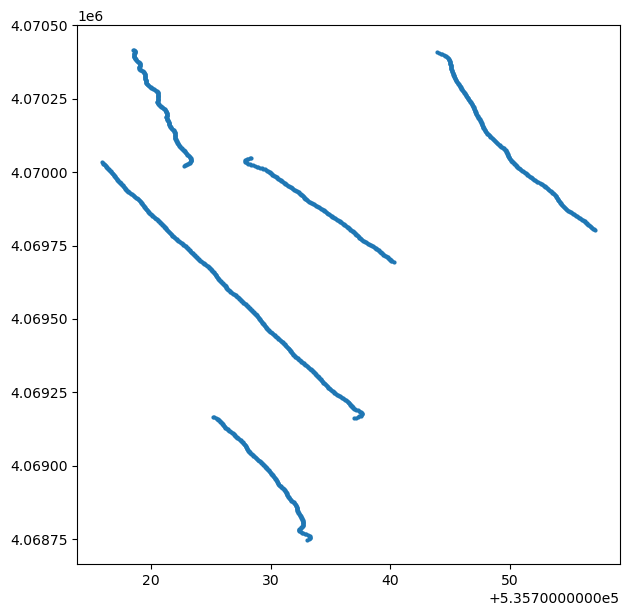

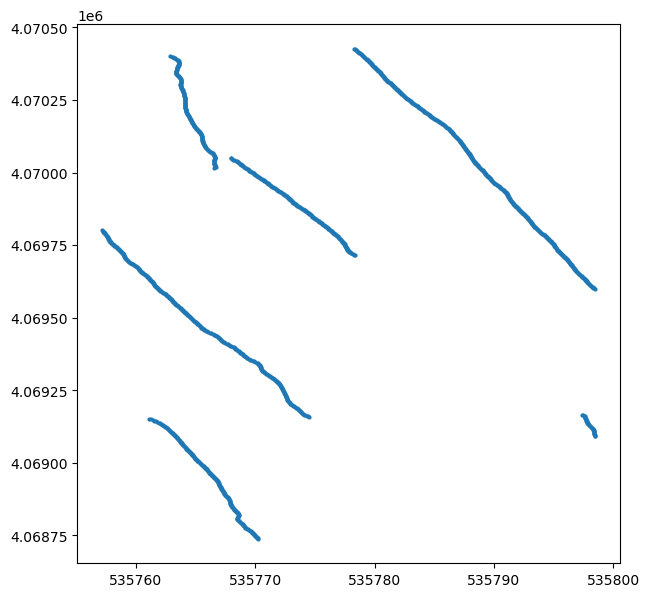

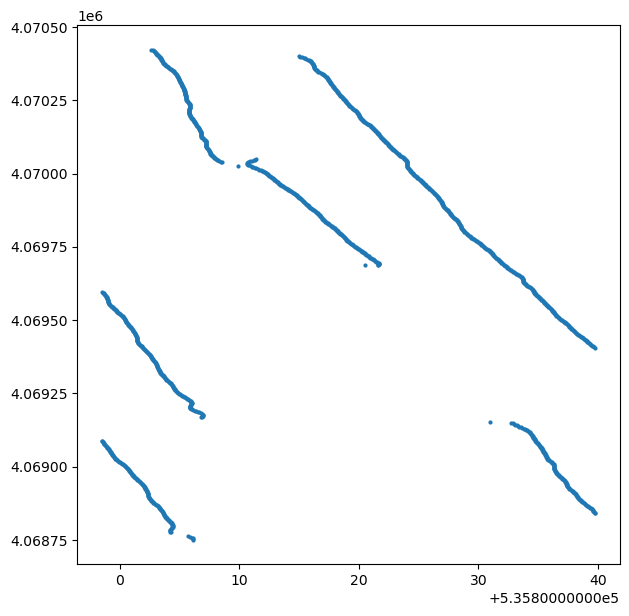

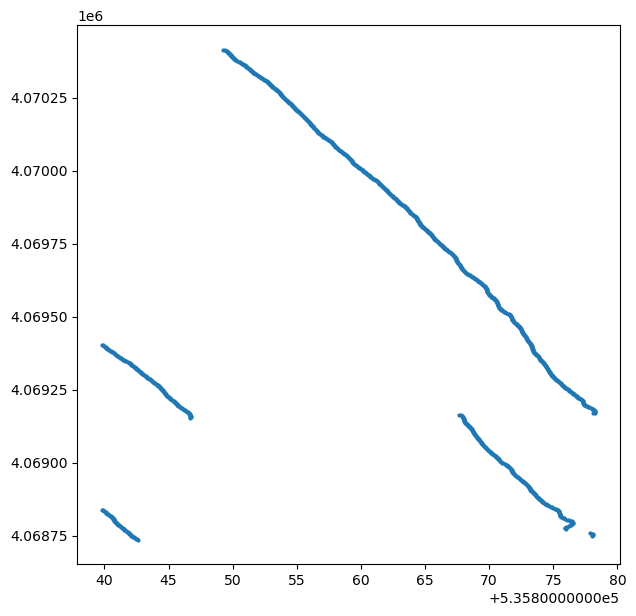

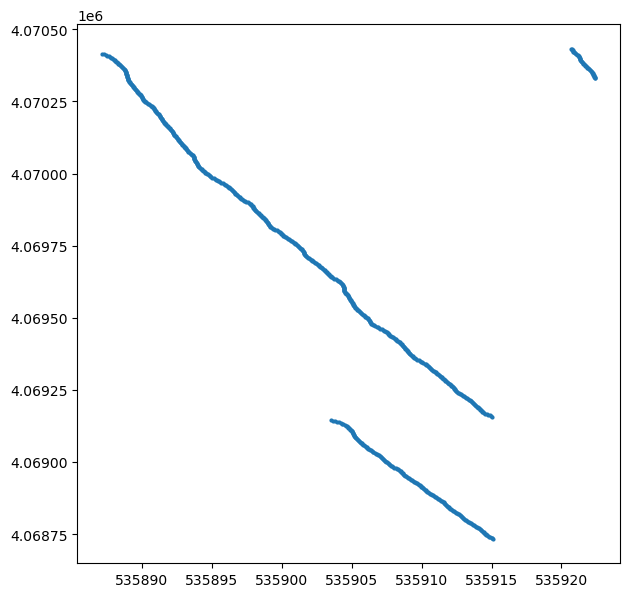

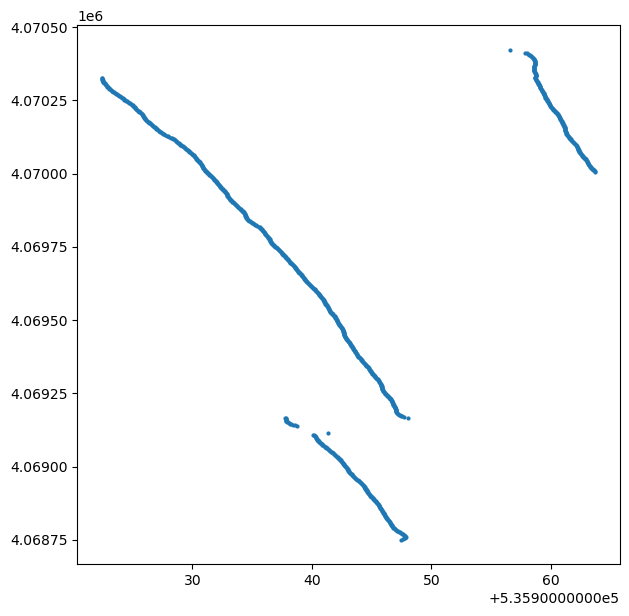

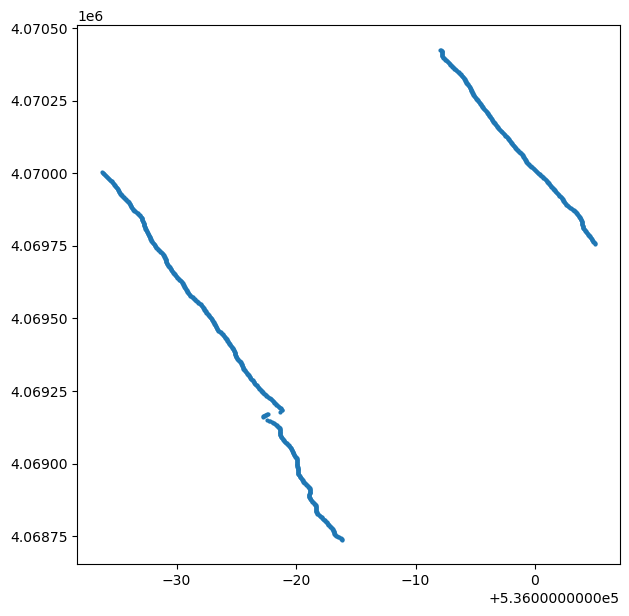

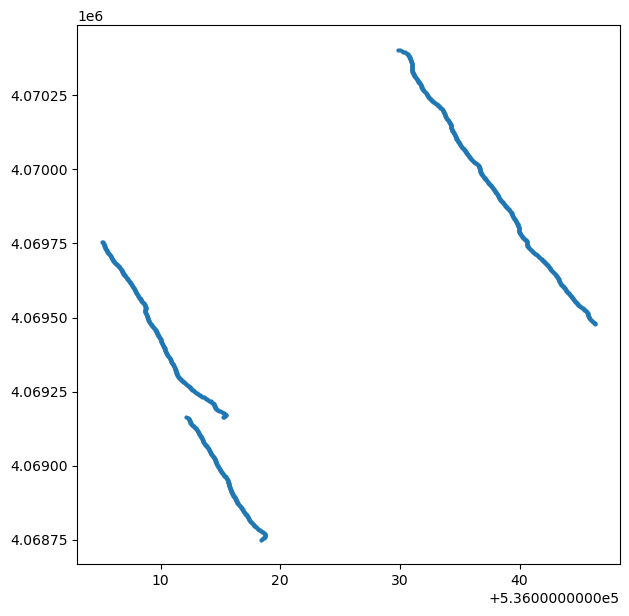

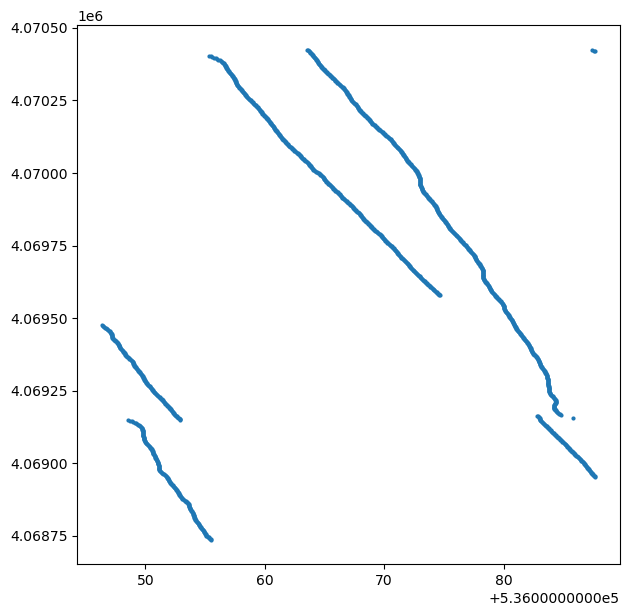

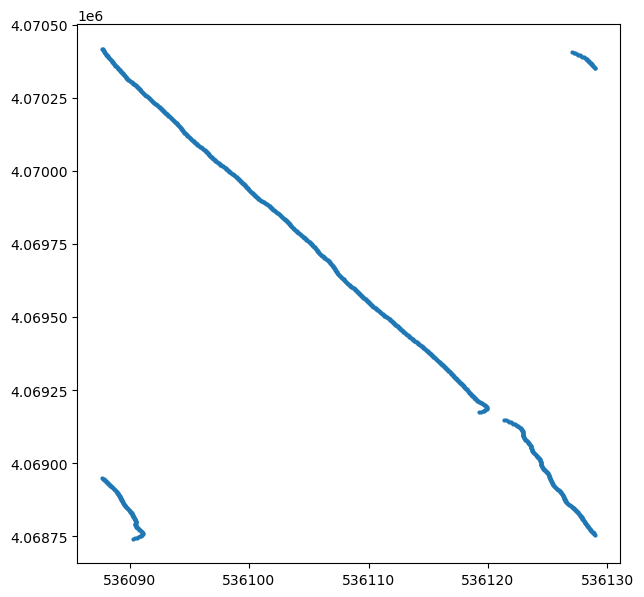

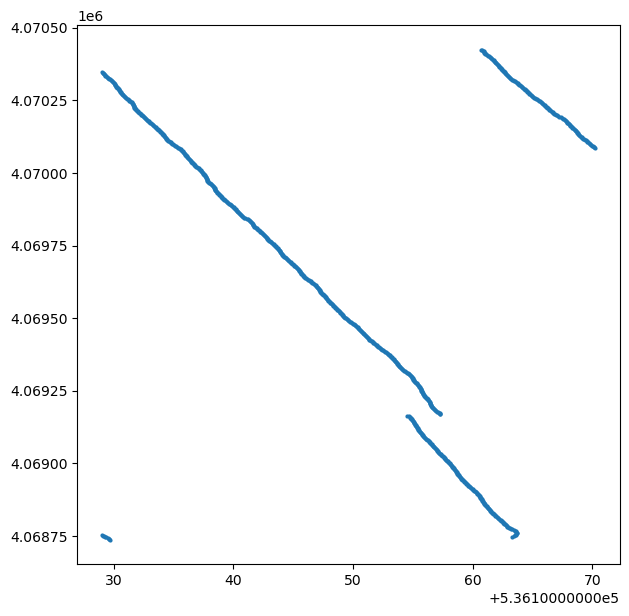

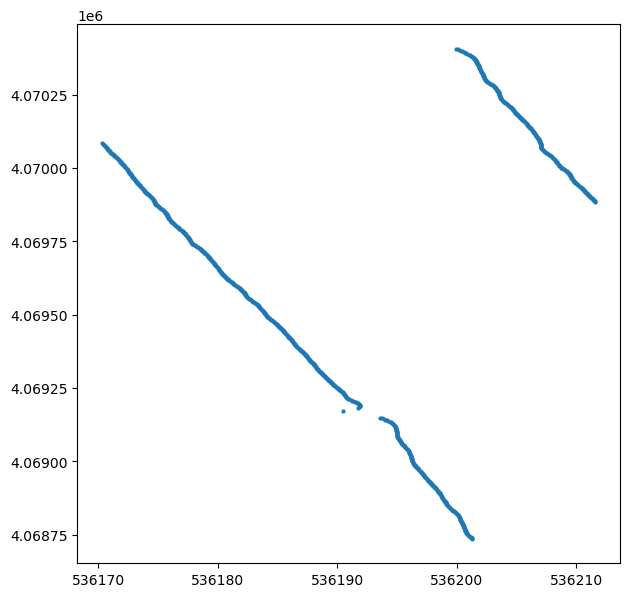

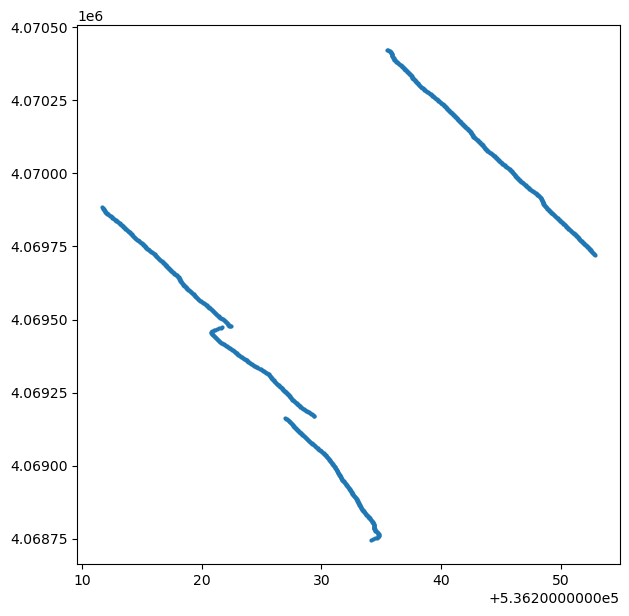

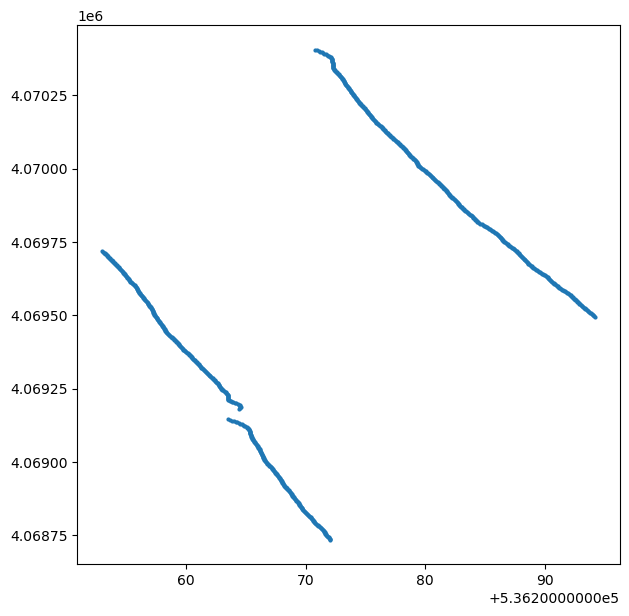

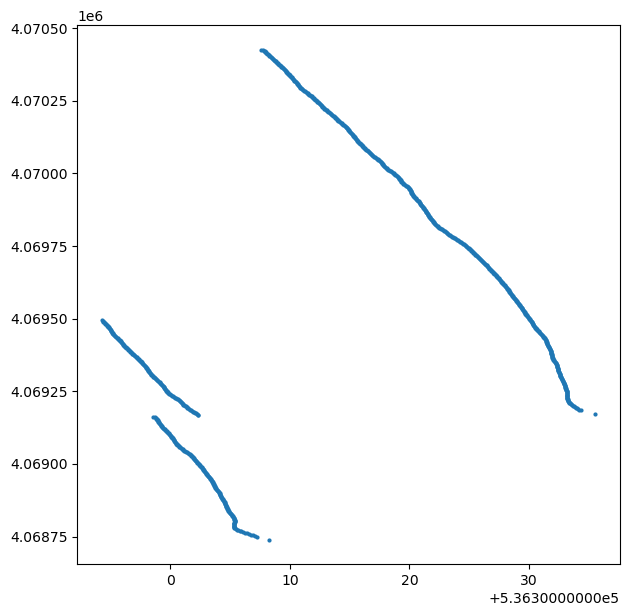

In [61]:

for name,group in data:
    fig, ax = plt.subplots(figsize=(7, 7))

    ax.plot(data.get_group(name)['Easting'], data.get_group(name)['Northing'],
        linestyle='None', marker="o", ms=2)

    plt.show()